In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(filepath_or_buffer='../DATA/cancer_tumor_data_features.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(scaled_X)

PCA(n_components=3)

In [5]:
components = pca.transform(scaled_X)
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

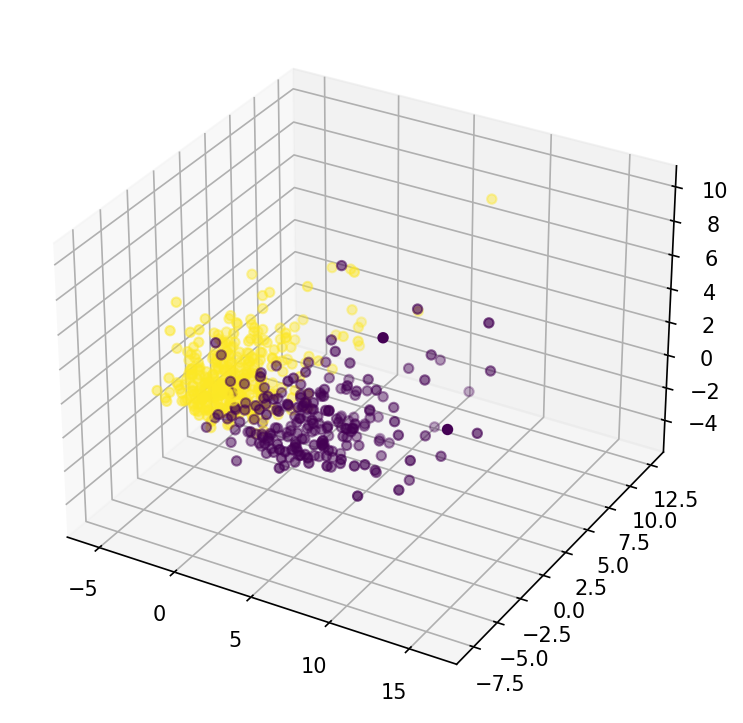

In [6]:
fig = plt.figure(figsize=(10,6), dpi=150)
ax = fig.add_axes(111,projection='3d')
ax.scatter3D(xs=components[:,0], ys=components[:,1], zs=components[:,2] , c= cancer['target']);

In [7]:
pca_dataframe = pd.DataFrame(data=pca.components_, index=[f"PC{i}" for i in range(1,pca.n_components_ + 1)], columns=df.columns)

<Axes: >

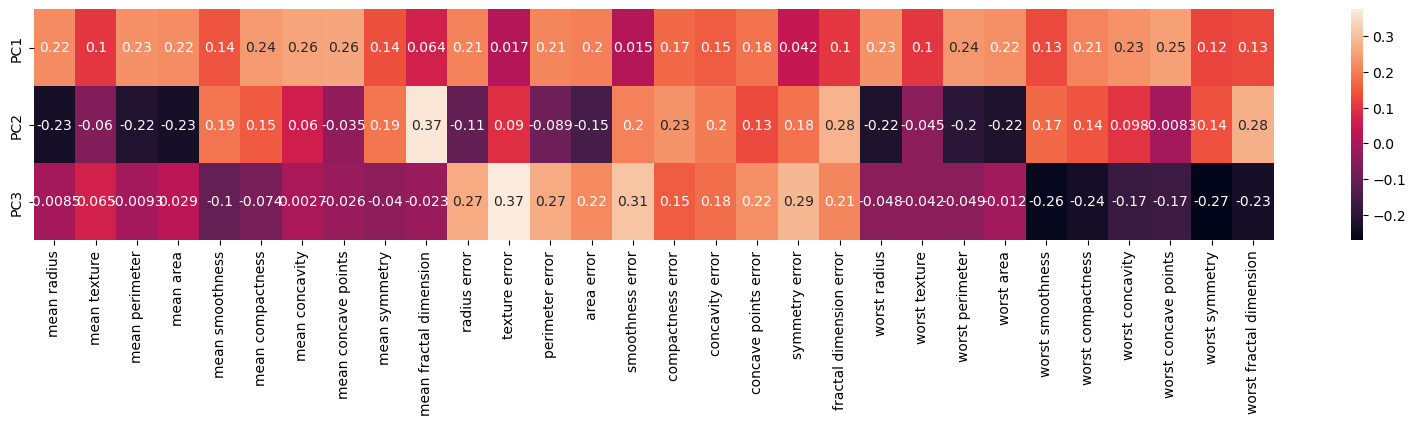

In [14]:
plt.figure(figsize=(20,3))
sns.heatmap(pca_dataframe, annot=True)

In [21]:
pca.explained_variance_ratio_.sum()

0.7263637090895386

In [24]:
pca_30 = PCA(n_components=30)

In [25]:
pca_30.fit(scaled_X)

PCA(n_components=30)

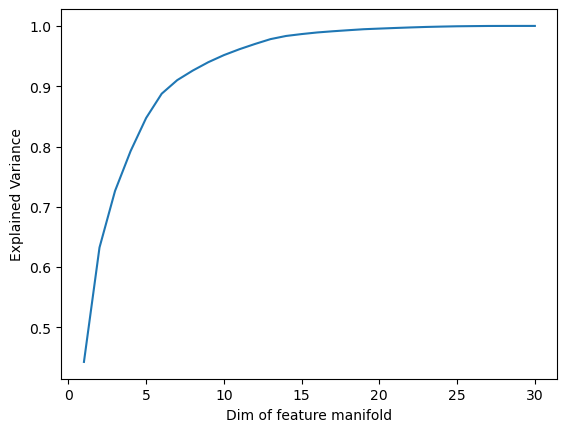

In [33]:
# Explaind variance as a function of number of dims of mainfold
plt.plot(range(1,31),np.cumsum(pca_30.explained_variance_ratio_))
plt.ylabel("Explained Variance")
plt.xlabel("Dim of feature manifold");